In [101]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
%autoreload 2

** Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Install dependencies

In [121]:
from helper import plot_images, color_hist, bin_spatial, get_hog_features, extract_features
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler


In [122]:
images = glob.glob('data/*/*/*.jpeg')
cars = []
not_cars = []
print(len(images))

2321


In [123]:
for image in images:
    if 'image' in image or 'extra' in image:
        not_cars.append(image)
    else:
        cars.append(image)
print(len(cars), len(not_cars))

1196 1125


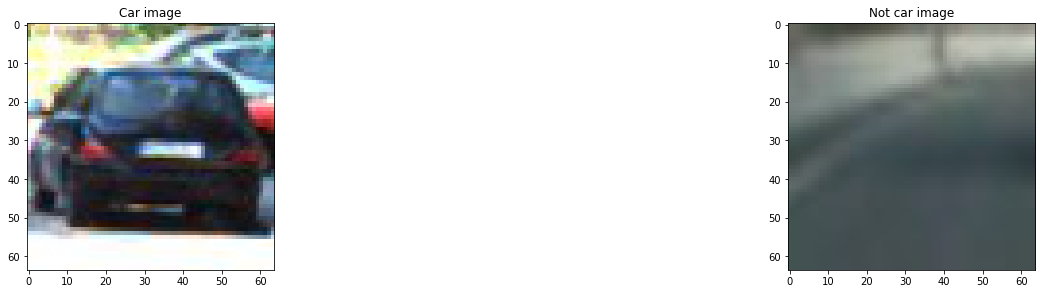

In [131]:
car_id = np.random.randint(0, len(cars))
not_car_id = np.random.randint(0, len(not_cars))

car_img = mpimg.imread(cars[car_id])
not_car_img = mpimg.imread(not_cars[not_car_id])

plot_images([car_img, not_car_img], ['Car image', 'Not car image'])

In [125]:
print(car_img.shape, not_car_img.shape)
print(car_img.dtype, not_car_img.dtype)

(64, 64, 3) (64, 64, 3)
uint8 uint8


## Explore vaious feature extraction

### Get histgram of color

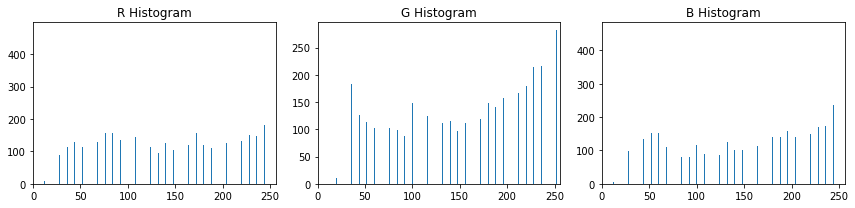

In [126]:
rh, gh, bh, bincen, feature_vec = color_hist(car_img, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

### Spatial benning of color

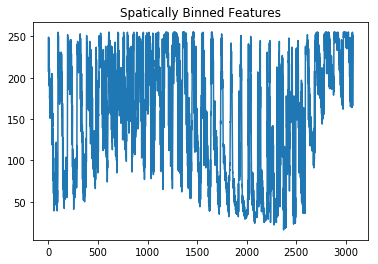

In [127]:
feature_vec = bin_spatial(car_img, color_space='RGB', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatically Binned Features')

### Hog features

In [128]:
gray = cv2.cvtColor(car_img, cv2.COLOR_RGB2GRAY)
features, hog_img = get_hog_features(gray, orient=9, pix_per_cell=8, cell_per_block=2, visalise=True)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


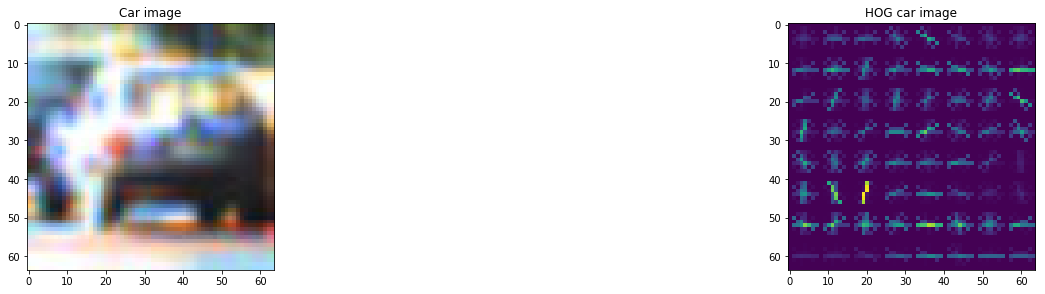

In [130]:
# Plot car original and hog image

plot_images([car_img, hog_img], ['Car image', 'HOG car image'])

### Combine and normalize features extracted by above methods

In [117]:
car_features = extract_features(cars, color_space='RGB', spatial_size=(32,32), hist_bins=32, hist_range=(0, 256))
not_car_features = extract_features(not_cars, color_space='RGB', spatial_size=(32,32), hist_bins=32, hist_range=(0, 256))

In [132]:
if len(car_features) > 0:
    X = np.concatenate((car_features, not_car_features))
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    fig = plt.figure(figsize=(12, 4))
    plt.imshow(car_img)
    plt.title('Original Car image')
    plt.subplot(121)
    plt.plot(X[car_id])
    plt.title('Raw features')
    plt.subplot(122)
    plt.plot(scaled_X[car_id])
    plt.title('Normalised features')
    fig.tight_layout()
else:
    print('Empty feature vectors')

ValueError: setting an array element with a sequence.